# 1. Context and Relevance
- Where is the data set coming from?
- How is the data sourced?
- How is the data collected?
- How often is the data updated?
- Are there any potential biases in the data?
- If there are, what are the risks and the implications?!

In [2]:
# import library
import pandas as pd

# Relative path to read the CSV file from the "raw-data" folder
df = pd.read_csv(r"C:\Users\engel\OneDrive\Documents\Portfolio\Portfolio Projects\Rotten Tomatos Movies\Rotten Tomatoes Movies.csv")

# 2. Data Quality

In [3]:
# Check for missing values
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(1)

# 3. Data Structure & Types

In [6]:
df.shape

(16638, 17)

In [7]:
df.dtypes

movie_title            object
movie_info             object
critics_consensus      object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
audience_count        float64
dtype: object

In [5]:
df.dtypes.value_counts()

object     12
float64     3
int64       2
Name: count, dtype: int64

# 4. Outliers

In [6]:
def find_extremes(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    return min_value, max_value

In [9]:
# Example usage
min_val, max_val = find_extremes(df, 'tomatometer_rating')
print(f"Minimum: {min_val}, Maximum: {max_val}")

Minimum: 0, Maximum: 100


In [10]:
# Find the 5 smallest values
smallest_values = df['tomatometer_rating'].nsmallest(5)
print("Smallest values:\n", smallest_values)

# Find the 5 largest values
largest_values = df["tomatometer_rating"].nlargest(5)
print("Largest values:\n", largest_values)

Smallest values:
 24    0
29    0
35    0
45    0
82    0
Name: tomatometer_rating, dtype: int64
Largest values:
 3     100
13    100
14    100
16    100
20    100
Name: tomatometer_rating, dtype: int64


# 5. Data Distribution & Summary Statistics

In [11]:
def calculat_statistics(df, column):
    """
    Returns the mean, median, and mode for a specified column in the DataFrame

    Parameters:
        df (pd.DataFrame): the DataFrame containing the data.
        column (str): The column name to calculate statistics for.
    
    Returns:
        dict: A dictionary containing the mean, median, and mode of the column.
    """
    
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None
    
    return{
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value
    }

In [13]:
# Example usage
stats = calculat_statistics(df, 'tomatometer_rating')
print(stats)

{'mean': np.float64(60.466522418559926), 'median': np.float64(66.0), 'mode': np.int64(100)}


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_seaborn(df, column, bins=10):
    """
    Creates a histogram for a specified column using seaborn.

    Parameters:
        df (pdDataFrame): The DataFrame containing the data.
        column (str): The column name to create a histogram for.
        bins (int): The number of bins in the histogram. Defaults to 10.
    """
    plt.figure(figsize=(10,6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True, edgecolor='black', kde_kws={'bw_adjust': 2})
    #sns.histplot(df[column].dropna(), bins=bins, kde=True, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

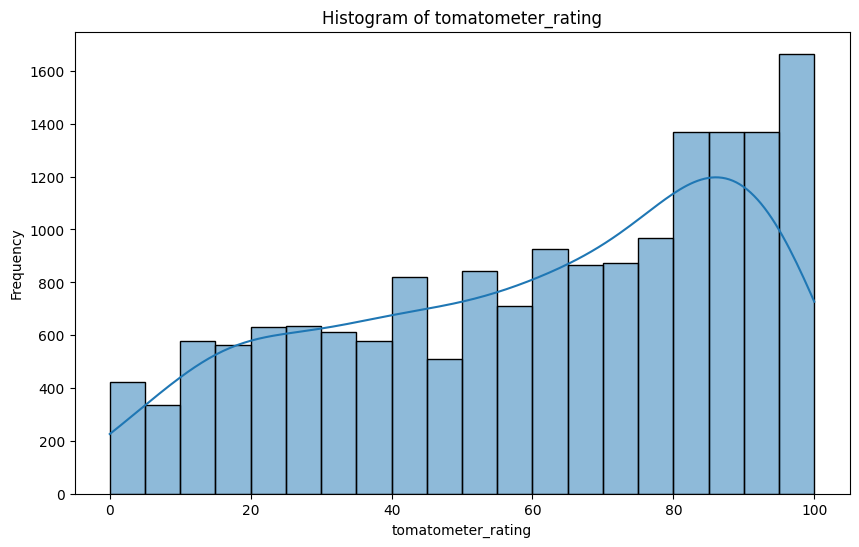

In [29]:
# Example usage
plot_histogram_seaborn(df, 'tomatometer_rating', bins=20)

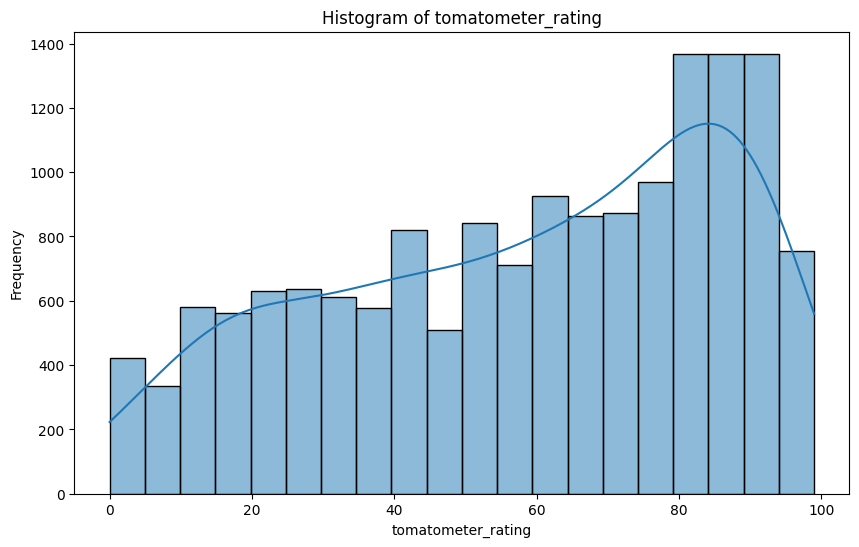

In [32]:
# Example usage
plot_histogram_seaborn(df[df.tomatometer_rating != 100], 'tomatometer_rating', bins=20)

<Axes: xlabel='tomatometer_rating', ylabel='Count'>

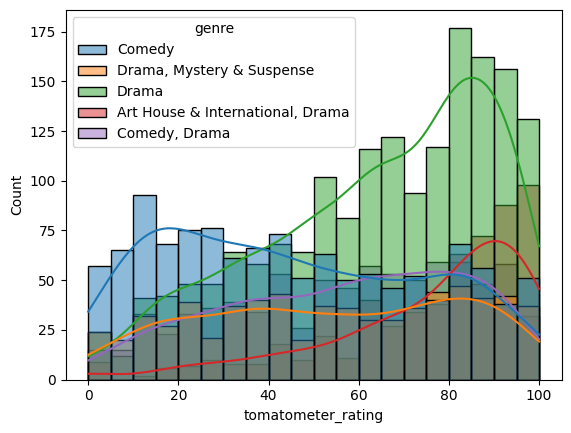

In [35]:
'''sns.histplot(df, x='tomatometer_rating', hue='genre', bins=100, kde=True)
plt.title('Histogram of Tomatometer rating by genre')
plt.show()

plt.figure(figsize=(12, 8))  # Increase figure size
sns.histplot(df, x='tomatometer_rating', hue='genre', bins=50, kde=True)

# Move legend outside
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Histogram of Points by Country')
plt.xlabel('Points')
plt.ylabel('Count')
plt.show()
'''

top_genre = df['genre'].value_counts().nlargest(5).index  # Get top 10 genre by count
filtered_df = df[df['genre'].isin(top_genre)]
sns.histplot(filtered_df, x='tomatometer_rating', hue='genre', bins=20, kde=True)

In [ ]:
sns.boxplot(data=df, x='genre', y='tomatometer_rating')
plt.title('Points Distribution by Genre')
plt.xticks(rotation=90)
plt.show()
